In [ ]:
#data analysis packages
from ast import increment_lineno
import pandas as pd
import numpy as np
import random as rnd

#visullizasion
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Machine_Learning/Final_project_data_new.xls')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        1000 non-null   object 
 1   Email                     757 non-null    object 
 2   FirstName                 997 non-null    object 
 3   Address_City_Name         950 non-null    object 
 4   Shop_Paypal_Email         12 non-null     object 
 5   DateCreated_datetime      1000 non-null   object 
 6   Commercial                1000 non-null   object 
 7   TotalProductWithShipping  800 non-null    float64
 8   TotalProductElectronics   1000 non-null   int64  
 9   TotalProductFashions      1000 non-null   int64  
 10  TotalProductHome          1000 non-null   int64  
 11  TotalProductKids          1000 non-null   int64  
 12  TotalProductEntertement   1000 non-null   int64  
 13  TotalProductCar           1000 non-null   int64  
 14  TotalProd

In [ ]:
#splitting the data to test and train data
test_df=data.loc[data["Commercial"]=='?']
train_df=data.loc[data["Commercial"]!='?']


#hypothesis
1-the "Shop_Paypal_Email" column has too many nulls , therfore it might not be relevant  <br/>
2- the info in "DateCreated_datetime" column is irelevant<br/>
3- the info in "Id" column is irelevent<br/>
4- the Email column could give us some indication on whether it is a shop or not- it may have something to do with the end of each mail(gmail.com , yahoo ,walla.com etc )<br/>


#Lets explore our data :

In [ ]:
data.shape

(1000, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        1000 non-null   object 
 1   Email                     757 non-null    object 
 2   FirstName                 997 non-null    object 
 3   Address_City_Name         950 non-null    object 
 4   Shop_Paypal_Email         12 non-null     object 
 5   DateCreated_datetime      1000 non-null   object 
 6   Commercial                1000 non-null   object 
 7   TotalProductWithShipping  800 non-null    float64
 8   TotalProductElectronics   1000 non-null   int64  
 9   TotalProductFashions      1000 non-null   int64  
 10  TotalProductHome          1000 non-null   int64  
 11  TotalProductKids          1000 non-null   int64  
 12  TotalProductEntertement   1000 non-null   int64  
 13  TotalProductCar           1000 non-null   int64  
 14  TotalProd

We see that there are too many nulls in the shop_paypal_email but we still dont know if we need to drop it .
judging by the name we suspect that this parameter only revolvs shops , therefore we might end up adjusting and completing it instead of removing it .



In [ ]:
shopPaypal_Commercial=train_df[["Shop_Paypal_Email","Commercial"]]
shopPaypal_Commercial.loc[shopPaypal_Commercial["Shop_Paypal_Email"].notnull()]

,Shop_Paypal_Email,Commercial
681,may977@rambler.ru,shop
695,leonperl@webdot.co.i,shop
713,vichi@gmail.com,shop
747,icloapid@aol.com,shop
757,mir4986o@gmail.com,shop
772,nimkar.16mb@gmail.com,shop
773,vikipiki@gmail.com,shop
821,rodion.khmarov@gmail.com,shop
843,nimkar.16mb@gmail.com,shop
889,hsimhon21@gmail.com,shop


We see that our suspicions were right ! all of the users that have this data are indeed shops . therfore we will complete the rest of the data by replacing 0-when the parameter is null and 1 otherwise.

In [ ]:
def map_to_01(value):
    if pd.isna(value):
        return 0
    elif isinstance(value, str):
        return 1
    else:
        return value



data['Shop_Paypal_Email'] = data['Shop_Paypal_Email'].apply(map_to_01)

#checking more hypothesis :
- the info in datatime column is irelevant
- the info in id column is irelevent
- the gmail colums may be intresting - it may have something to do with the end of each mail(gmail.com , yahoo ,walla.com etc )

In [ ]:
data=data.drop(["Id","FirstName","DateCreated_datetime"],axis=1)
data

,Email,Address_City_Name,Shop_Paypal_Email,Commercial,TotalProductWithShipping,TotalProductElectronics,TotalProductFashions,TotalProductHome,TotalProductKids,TotalProductEntertement,TotalProductCar,TotalProductAntique,TotalProductInstruments,TotalProductOther,TotalProductMusic,TotalProductRealAState,TotalProductWheels,total_products
0,kerensum2001@yahoo.com,tel aviv-yafo,0,?,0.0,0,1,0,0,0,0,0,0,0,0,0,0,2
1,nasasrarahma@gmail.com,hura,0,?,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
2,orenzakai@gmail.com,tel aviv-yafo,0,?,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
3,lority1097@gmail.com,tel aviv-yafo,0,?,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
4,eliy123456@walla.com,jerusalem,0,?,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,danakoren22@gmail.com,hod hasharon,0,shop,0.0,0,4,1,0,0,0,0,0,0,0,0,0,5
996,NaN,jerusalem,0,shop,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1
997,yanivduek1@gmail.com,tel aviv-yafo,0,shop,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1
998,NaN,tel aviv-yafo,0,shop,0.0,3,2,1,0,0,0,0,0,0,0,0,2,8


lets explore the mail column


In [ ]:
data.Email.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: Email
Non-Null Count  Dtype 
--------------  ----- 
757 non-null    object
dtypes: object(1)
memory usage: 7.9+ KB


we see that most of the Emails are not nulls but we still have many nulls , we will deal with them later

In [ ]:
def extract_domain(email):
    if pd.isna(email):
        return None
    else:
        return email.split('@')[-1]

data['Domain'] = data['Email'].apply(extract_domain)
data.Domain.head()
data.Domain.unique()


array(['yahoo.com', 'gmail.com', 'walla.com', 'hotmail.com',
       'zahav.net.il', None, 'walla.co.il', 'list.ru', '013.net',
       'hotufi.net', '012.net.il', 'icloud.com', 'mail.ru',
       'bezeqint.net', 'albar.co.il', 'cloudtestlabaccounts.com',
       'windowslive.com', 'aol.com', 'yyyu.com', '2net.co.il',
       'beatman.com', 'inbox.ru', 'hotmail.co.il', 'campus.haifa.ac.il',
       'yahoo.co.uk', '013net.net', 'dmnxcnenc.com', 'yandex.ru',
       'outlook.com', 'outlook.co.il', 'tinder.com', 'custom.gov.il',
       'webdot.co.il', 'yhaoo.com', 'tfbnw.net', 'brn.tzafonet.org.il',
       'nana10.co.il', 'gmil.com', 'nana.co.il'], dtype=object)

In [ ]:
#splitting the data to test and train data
test_df=data.loc[data["Commercial"]=='?']
train_df=data.loc[data["Commercial"]!='?']

In [ ]:
Domain_Commercial=train_df[["Domain","Commercial"]]
#there are nulls that we will ignore for now
filtered_domain_df = train_df[train_df['Domain'].notnull()]
filtered_domain_df.Domain.unique()

array(['walla.com', 'gmail.com', 'hotufi.net', 'walla.co.il',
       'icloud.com', 'zahav.net.il', 'hotmail.com', 'bezeqint.net',
       'mail.ru', 'albar.co.il', '012.net.il', '2net.co.il', 'inbox.ru',
       'hotmail.co.il', 'campus.haifa.ac.il', 'windowslive.com',
       '013net.net', 'outlook.co.il', 'tinder.com', '013.net',
       'custom.gov.il', 'yandex.ru', 'yahoo.com', 'webdot.co.il',
       'yhaoo.com', 'aol.com', 'tfbnw.net', 'brn.tzafonet.org.il',
       'nana10.co.il', 'gmil.com', 'nana.co.il'], dtype=object)

In [ ]:
filtered_domain_df.Domain.unique().shape

(31,)

there are 31 diffrent Domains , we know that some of them are typos  - like gmil.com that is supposed to be gmail.com

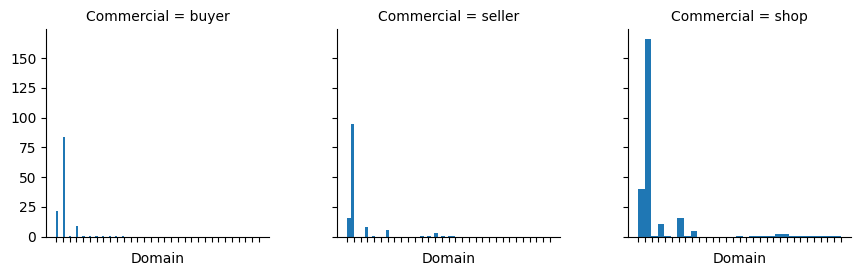

In [ ]:
g = sns.FacetGrid(filtered_domain_df, col="Commercial")
g.map(plt.hist, "Domain", bins=31)

# Remove x-axis tick labels (domain names) from all subplots
for ax in g.axes.flat:
    ax.set_xticklabels([])

plt.show()

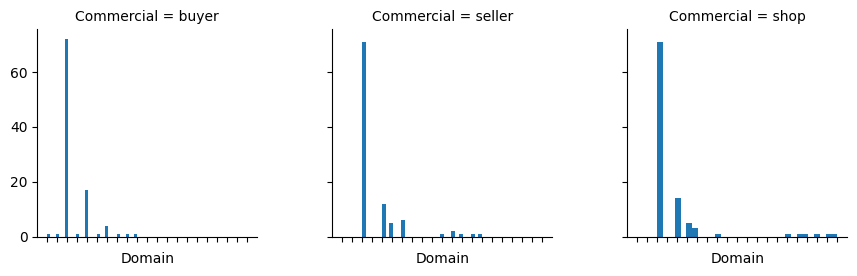

In [ ]:
random_buyers = filtered_domain_df.loc[filtered_domain_df["Commercial"] == 'buyer'].sample(n=100, random_state=3)
random_sellers = filtered_domain_df.loc[filtered_domain_df["Commercial"] == 'seller'].sample(n=100, random_state=3)
random_shops = filtered_domain_df.loc[filtered_domain_df["Commercial"] == 'shop'].sample(n=100, random_state=3)
random_commercial = pd.concat([random_buyers, random_sellers, random_shops], ignore_index=True)
g = sns.FacetGrid(random_commercial, col="Commercial")
g.map(plt.hist, "Domain", bins=31)

# Remove x-axis tick labels (domain names) from all subplots
for ax in g.axes.flat:
    ax.set_xticklabels([])

plt.show()

we see that there is no connection between the domain and the commercial - it
distributes in the same way . therfore we will remove the Email column

In [ ]:
data=data.drop(["Email"],axis=1)
data

,Address_City_Name,Shop_Paypal_Email,Commercial,TotalProductWithShipping,TotalProductElectronics,TotalProductFashions,TotalProductHome,TotalProductKids,TotalProductEntertement,TotalProductCar,TotalProductAntique,TotalProductInstruments,TotalProductOther,TotalProductMusic,TotalProductRealAState,TotalProductWheels,total_products,Domain
0,tel aviv-yafo,0,?,0.0,0,1,0,0,0,0,0,0,0,0,0,0,2,yahoo.com
1,hura,0,?,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,gmail.com
2,tel aviv-yafo,0,?,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,gmail.com
3,tel aviv-yafo,0,?,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,gmail.com
4,jerusalem,0,?,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,walla.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,hod hasharon,0,shop,0.0,0,4,1,0,0,0,0,0,0,0,0,0,5,gmail.com
996,jerusalem,0,shop,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,None
997,tel aviv-yafo,0,shop,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,gmail.com
998,tel aviv-yafo,0,shop,0.0,3,2,1,0,0,0,0,0,0,0,0,2,8,None


Now we want to check if there is a colleration between citys and shops :


In [ ]:
data.head()

,Address_City_Name,Shop_Paypal_Email,Commercial,TotalProductWithShipping,TotalProductElectronics,TotalProductFashions,TotalProductHome,TotalProductKids,TotalProductEntertement,TotalProductCar,TotalProductAntique,TotalProductInstruments,TotalProductOther,TotalProductMusic,TotalProductRealAState,TotalProductWheels,total_products,Domain
0,tel aviv-yafo,0,?,0.0,0,1,0,0,0,0,0,0,0,0,0,0,2,yahoo.com
1,hura,0,?,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,gmail.com
2,tel aviv-yafo,0,?,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,gmail.com
3,tel aviv-yafo,0,?,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,gmail.com
4,jerusalem,0,?,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,walla.com


In [ ]:
data.Address_City_Name.unique()

array(['tel aviv-yafo', 'hura', 'jerusalem', 'rehovot', 'bnei brak',
       'kfar tavor', 'herzliya', 'hadera', 'giv‘atayim', 'yaqum',
       'rishon letsiyon', 'tel aviv', 'haifa', 'yakum',
       "modi'in-maccabim-re'ut", 'ramla', "be'er sheva", 'lod', 'holon',
       'ramat gan', 'ashdod', 'bat yam', 'netanya', 'kiryat ekron',
       'kiryat ata', 'beersheba', 'zavdiel', 'hod hasharon',
       'petah tikva', 'ganei tikva', 'pardes hanna-karkur', 'kfar sirkin',
       'nahariyya', 'kidron', nan, "binyamina giv'at ada", 'ness ziona',
       'kiryat malakhi', 'ramat hasharon', 'yavne', "giv'at shmuel",
       'baqa al-gharbiyye', 'afula', 'ben zakai', 'ben-gurion airport',
       'bet shemesh', 'isfiya', 'kiryat yam', 'tel mond', 'kiryat gat',
       'rosh haayin', 'gat', 'milpitas', 'azor', "giv'atayim",
       'neve yamin', 'ashkelon', 'yarka', 'karmiel', 'ashburn',
       "yokne'am moshava", 'dimona', 'tayibe', 'nehalim', 'even yehuda',
       "kiryat tiv'on", 'akko', 'nir hen', 'ti

In [ ]:
data.Address_City_Name.unique().shape

(169,)

In [ ]:
City_Commercial=train_df[["Address_City_Name","Commercial"]]
#there are nulls that we will ignore for now
filtered_city_df = train_df[train_df['Address_City_Name'].notnull()]
filtered_city_df.Address_City_Name.unique()

array(['ashdod', 'ramat gan', 'petah tikva', 'ganei tikva', 'haifa',
       'pardes hanna-karkur', 'kfar sirkin', 'nahariyya', 'lod',
       'tel aviv-yafo', 'jerusalem', 'kidron', 'rishon letsiyon', 'yakum',
       'ramla', 'ness ziona', 'kiryat malakhi', 'ramat hasharon', 'holon',
       'herzliya', "giv'at shmuel", 'tel aviv', 'netanya', 'beersheba',
       'baqa al-gharbiyye', 'rehovot', 'afula', 'kiryat ekron',
       'ben zakai', "modi'in-maccabim-re'ut", 'hadera',
       'ben-gurion airport', 'bet shemesh', 'isfiya', 'kiryat yam',
       'tel mond', 'kiryat gat', 'bat yam', 'yavne', 'rosh haayin', 'gat',
       'azor', "giv'atayim", 'ashkelon', "be'er sheva", 'yarka',
       'karmiel', '?????', 'kafr manda', 'eilat', "sha'alvim", 'acre',
       'safed', '??? ???', 'adamit', 'hatzor haglilit', 'netivot',
       'yehud', 'shlomi', 'yaqum', 'arad', "ar'ara", '????? ?????',
       '????', 'shaqib al-salam', 'nazareth iliit', 'sderot', '?? ??',
       "?'?? ?-????", '??????', 'kfar s

In [ ]:
filtered_city_df.Address_City_Name.unique().shape

(142,)

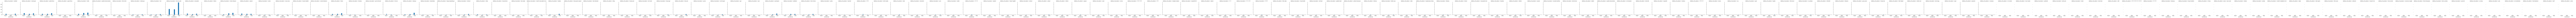

In [ ]:
g=sns.FacetGrid(filtered_city_df,col="Address_City_Name")
g.map(plt.hist,"Commercial")

In [ ]:
data.loc[data["Commercial"]=='shop'].shape

(349, 18)

In [ ]:
data.loc[data["Commercial"]=='buyer'].shape

(155, 18)

In [ ]:
data.loc[data["Commercial"]=='seller'].shape

(199, 18)

we see that there are significantly more shops than buyers and sellers , therfore we are not suprised by the histograms result.
we will take the same amount of shops,buyers and sellers to have a more accurate vision on this parameter.  

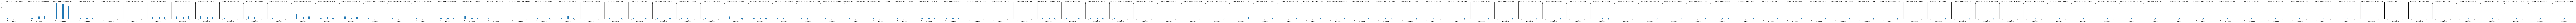

In [ ]:
random_buyers = data.loc[data["Commercial"] == 'buyer'].sample(n=150, random_state=42)
random_sellers = data.loc[data["Commercial"] == 'seller'].sample(n=150, random_state=42)
random_shops = data.loc[data["Commercial"] == 'shop'].sample(n=150, random_state=42)
random_commercial = pd.concat([random_buyers, random_sellers, random_shops], ignore_index=True)
g=sns.FacetGrid(random_commercial,col="Address_City_Name")
g.map(plt.hist,"Commercial")

we looked at all of the historgrams and we concluded that there is no coleration between the parameters .
therfore we will drop this column

In [ ]:
data=data.drop(["Address_City_Name"],axis=1)

In [ ]:
data=data.drop(["Domain"],axis=1)

In [ ]:
data

,Shop_Paypal_Email,Commercial,TotalProductWithShipping,TotalProductElectronics,TotalProductFashions,TotalProductHome,TotalProductKids,TotalProductEntertement,TotalProductCar,TotalProductAntique,TotalProductInstruments,TotalProductOther,TotalProductMusic,TotalProductRealAState,TotalProductWheels,total_products
0,0,?,0.0,0,1,0,0,0,0,0,0,0,0,0,0,2
1,0,?,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,?,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,?,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,?,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,shop,0.0,0,4,1,0,0,0,0,0,0,0,0,0,5
996,0,shop,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1
997,0,shop,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1
998,0,shop,0.0,3,2,1,0,0,0,0,0,0,0,0,2,8


#Now we move on to the products columns .
first we want to check if any of the paremeters are linear dependent , using pearson correlation coefficient. then we will display is using heatmap


In [ ]:
products_data = data.iloc[:, 3:15]
products_data

,TotalProductElectronics,TotalProductFashions,TotalProductHome,TotalProductKids,TotalProductEntertement,TotalProductCar,TotalProductAntique,TotalProductInstruments,TotalProductOther,TotalProductMusic,TotalProductRealAState,TotalProductWheels
0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,4,1,0,0,0,0,0,0,0,0,0
996,1,0,0,0,0,0,0,0,0,0,0,0
997,0,0,1,0,0,0,0,0,0,0,0,0
998,3,2,1,0,0,0,0,0,0,0,0,2


In [ ]:
products_data.corr()

,TotalProductElectronics,TotalProductFashions,TotalProductHome,TotalProductKids,TotalProductEntertement,TotalProductCar,TotalProductAntique,TotalProductInstruments,TotalProductOther,TotalProductMusic,TotalProductRealAState,TotalProductWheels
TotalProductElectronics,1.000000,0.294473,0.554932,0.094018,0.363469,0.566334,0.208940,0.164292,0.646246,0.290677,0.020736,0.142664
TotalProductFashions,0.294473,1.000000,0.319992,0.208667,0.246340,0.282962,0.287302,0.142341,0.368226,0.210206,0.088728,0.017437
TotalProductHome,0.554932,0.319992,1.000000,0.224080,0.236660,0.547449,0.392008,0.152330,0.634407,0.313274,0.078439,0.093496
TotalProductKids,0.094018,0.208667,0.224080,1.000000,0.087128,0.007703,0.548580,0.079913,0.136025,0.237479,0.220222,-0.004289
TotalProductEntertement,0.363469,0.246340,0.236660,0.087128,1.000000,0.194733,0.106535,0.075211,0.296694,0.206006,0.002057,0.069402
TotalProductCar,0.566334,0.282962,0.547449,0.007703,0.194733,1.000000,0.204577,0.105823,0.623606,0.265939,0.036107,0.096760
TotalProductAntique,0.208940,0.287302,0.392008,0.548580,0.106535,0.204577,1.000000,0.015124,0.303706,0.378837,0.330179,0.007741
TotalProductInstruments,0.164292,0.142341,0.152330,0.079913,0.075211,0.105823,0.015124,1.000000,0.118285,0.211259,-0.017204,0.099836
TotalProductOther,0.646246,0.368226,0.634407,0.136025,0.296694,0.623606,0.303706,0.118285,1.000000,0.327601,0.068784,0.106291
TotalProductMusic,0.290677,0.210206,0.313274,0.237479,0.206006,0.265939,0.378837,0.211259,0.327601,1.000000,0.122546,-0.008678


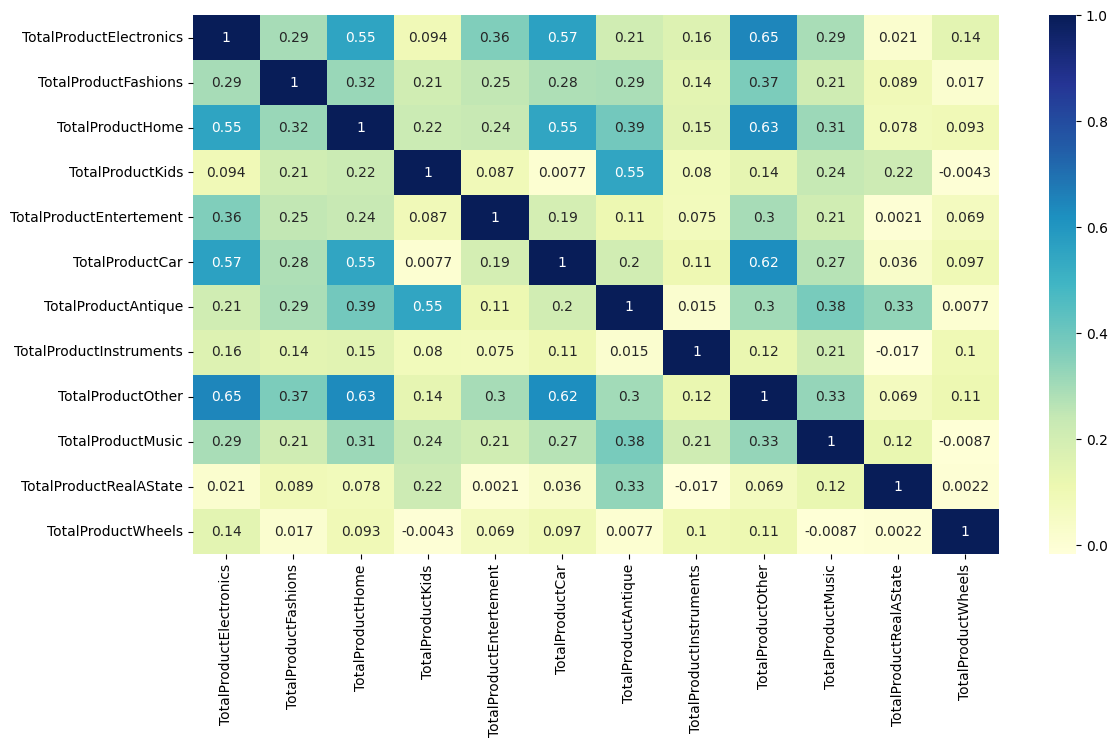

In [ ]:
plt.figure(figsize=(13, 7))
dataplot = sns.heatmap(products_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

we can conclude that there isn't any clear colleration between the columns therfore we will not drop any of them

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Shop_Paypal_Email         1000 non-null   int64  
 1   Commercial                1000 non-null   object 
 2   TotalProductWithShipping  800 non-null    float64
 3   TotalProductElectronics   1000 non-null   int64  
 4   TotalProductFashions      1000 non-null   int64  
 5   TotalProductHome          1000 non-null   int64  
 6   TotalProductKids          1000 non-null   int64  
 7   TotalProductEntertement   1000 non-null   int64  
 8   TotalProductCar           1000 non-null   int64  
 9   TotalProductAntique       1000 non-null   int64  
 10  TotalProductInstruments   1000 non-null   int64  
 11  TotalProductOther         1000 non-null   int64  
 12  TotalProductMusic         1000 non-null   int64  
 13  TotalProductRealAState    1000 non-null   int64  
 14  TotalProd

we see that there is some missing information in the total products with shipping column. we will check it out

---



In [ ]:
shipping_Commercial=train_df[["TotalProductWithShipping","Commercial"]]
shippingshop_Commercial=shipping_Commercial.loc[shipping_Commercial["Commercial"]=="shop"]
shippingseller_Commercial=shipping_Commercial.loc[shipping_Commercial["Commercial"]=="seller"]
shippingbuyer_Commercial=shipping_Commercial.loc[shipping_Commercial["Commercial"]=="buyer"]

In [ ]:
mean1=shippingshop_Commercial.TotalProductWithShipping.mean()
mean1

1.3180515759312321

In [ ]:
mean2=shippingseller_Commercial.TotalProductWithShipping.mean()
mean2

0.15577889447236182

In [ ]:
shippingbuyer_Commercial.TotalProductWithShipping.mean()

nan

We see that every single buyer has no info in the total procuts with shipping, therfor we cunclude that it is only relevent for shops and for sellers. after looking at the averagers of each one we see that shops have a significantly high avg - close to 1 while the average ammount for a seller is closer to 0

In [ ]:
def map_nan_to_0(value):
    if pd.isna(value):
        return 0
    else:
        return value

data['TotalProductWithShipping'] = data['TotalProductWithShipping'].apply(map_nan_to_0)

In [ ]:
data

,Shop_Paypal_Email,Commercial,TotalProductWithShipping,TotalProductElectronics,TotalProductFashions,TotalProductHome,TotalProductKids,TotalProductEntertement,TotalProductCar,TotalProductAntique,TotalProductInstruments,TotalProductOther,TotalProductMusic,TotalProductRealAState,TotalProductWheels,total_products
0,0,?,0.0,0,1,0,0,0,0,0,0,0,0,0,0,2
1,0,?,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,?,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,?,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,?,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,shop,0.0,0,4,1,0,0,0,0,0,0,0,0,0,5
996,0,shop,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1
997,0,shop,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1
998,0,shop,0.0,3,2,1,0,0,0,0,0,0,0,0,2,8


##Now after we have finished working with the data we can start runing algorithms on it

In [ ]:
#splitting the data to test and train data
known_df=data.loc[data["Commercial"]!='?']
unknown_df=data.loc[data["Commercial"]=='?']

mapping commercial data to numbers


In [ ]:
commercial_mapping = {'seller': 0, 'buyer': 0, 'shop': 1}
known_mapped=known_df.copy()
known_mapped['Commercial'] = known_mapped['Commercial'].map(commercial_mapping)
known_mapped

,Shop_Paypal_Email,Commercial,TotalProductWithShipping,TotalProductElectronics,TotalProductFashions,TotalProductHome,TotalProductKids,TotalProductEntertement,TotalProductCar,TotalProductAntique,TotalProductInstruments,TotalProductOther,TotalProductMusic,TotalProductRealAState,TotalProductWheels,total_products
49,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
51,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
52,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
53,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
54,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0.0,0,4,1,0,0,0,0,0,0,0,0,0,5
996,0,1,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1
997,0,1,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1
998,0,1,0.0,3,2,1,0,0,0,0,0,0,0,0,2,8


splitting the data to train and test

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(known_mapped, test_size=0.2, random_state=42)

#Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score

train_data, test_data = train_test_split(known_mapped, test_size=0.2, random_state=42)
X_train=train_data.drop(["Commercial"],axis=1)
y_train=train_data["Commercial"]
X_test=test_data.drop(["Commercial"],axis=1)
y_test=test_data["Commercial"]


# Create and fit the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

logistic_y_pred = logistic_model.predict(X_test)
binary_y_pred = [1 if value > 0.5 else 0 for value in logistic_y_pred]

# Calculate precision
precision = precision_score(y_test, binary_y_pred)
# Perform cross-validation
print("Precision:", precision)


Precision: 0.8775510204081632


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score

train_data, test_data = train_test_split(known_mapped, test_size=0.2, random_state=5)
X_train=train_data.drop(["Commercial"],axis=1)
y_train=train_data["Commercial"]
X_test=test_data.drop(["Commercial"],axis=1)
y_test=test_data["Commercial"]


# Create and fit the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

logistic_y_pred = logistic_model.predict(X_test)
binary_y_pred = [1 if value > 0.5 else 0 for value in logistic_y_pred]

# Calculate precision
precision = precision_score(y_test, binary_y_pred)
# Perform cross-validation
print("Precision:", precision)


Precision: 0.9122807017543859


In [ ]:
X_test.loc[X_test["Shop_Paypal_Email"]==1]

,Shop_Paypal_Email,TotalProductWithShipping,TotalProductElectronics,TotalProductFashions,TotalProductHome,TotalProductKids,TotalProductEntertement,TotalProductCar,TotalProductAntique,TotalProductInstruments,TotalProductOther,TotalProductMusic,TotalProductRealAState,TotalProductWheels,total_products
681,1,80.0,0,99,0,0,0,0,0,0,1,0,0,0,101
747,1,3.0,6,6,1,1,0,0,0,0,1,0,0,0,16
843,1,0.0,17,0,1,1,0,0,0,0,0,0,0,0,19


In [ ]:
test_data = test_data.assign(Ypred=binary_y_pred)
test_data.loc[X_test["Shop_Paypal_Email"]==1]

,Shop_Paypal_Email,Commercial,TotalProductWithShipping,TotalProductElectronics,TotalProductFashions,TotalProductHome,TotalProductKids,TotalProductEntertement,TotalProductCar,TotalProductAntique,TotalProductInstruments,TotalProductOther,TotalProductMusic,TotalProductRealAState,TotalProductWheels,total_products,Ypred
681,1,1,80.0,0,99,0,0,0,0,0,0,1,0,0,0,101,1
747,1,1,3.0,6,6,1,1,0,0,0,0,1,0,0,0,16,1
843,1,1,0.0,17,0,1,1,0,0,0,0,0,0,0,0,19,1


##Decision tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split, cross_val_score

# Assuming you have already defined train_data and test_data
train_data, test_data = train_test_split(known_mapped, test_size=0.2, random_state=42)
X_train = train_data.drop(["Commercial"], axis=1)
y_train = train_data["Commercial"]
X_test = test_data.drop(["Commercial"], axis=1)
y_test = test_data["Commercial"]

# Create and fit the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

tree_y_pred = tree_model.predict(X_test)

# Calculate precision
precision = precision_score(y_test, tree_y_pred)

# Perform cross-validation
cv_precision = cross_val_score(tree_model, X_train, y_train, cv=5, scoring='precision')

print("Precision:", precision)
print("Cross-Validation Precisions:", cv_precision)

Precision: 0.7121212121212122
Cross-Validation Precisions: [0.75       0.71428571 0.75       0.7254902  0.74074074]


##Random forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split, cross_val_score

# Assuming you have already defined train_data and test_data
train_data, test_data = train_test_split(known_mapped, test_size=0.2, random_state=5)
X_train = train_data.drop(["Commercial"], axis=1)
y_train = train_data["Commercial"]
X_test = test_data.drop(["Commercial"], axis=1)
y_test = test_data["Commercial"]

# Create and fit the Random Forest model
forest_model = RandomForestClassifier(random_state=5)
forest_model.fit(X_train, y_train)

forest_y_pred = forest_model.predict(X_test)

# Calculate precision
precision = precision_score(y_test, forest_y_pred)

# Perform cross-validation
cv_precision = cross_val_score(forest_model, X_train, y_train, cv=5, scoring='precision')

print("Precision:", precision)
print("Cross-Validation Precisions:", cv_precision)

Precision: 0.7831325301204819
Cross-Validation Precisions: [0.69811321 0.66666667 0.66216216 0.73846154 0.77777778]


#After testsing all of the model we concluded that the logistic regression is the most accurate , therfore we will use it to predict the values of the unknown data :


In [ ]:

X_test=unknown_df.drop(["Commercial"],axis=1)

logistic_y_pred = logistic_model.predict(X_test)
binary_y_pred = [1 if value > 0.5 else 0 for value in logistic_y_pred]
unknown_df["Commercial"]=binary_y_pred

unknown_df

<ipython-input-378-f36fb776113b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown_df["Commercial"]=binary_y_pred


,Shop_Paypal_Email,Commercial,TotalProductWithShipping,TotalProductElectronics,TotalProductFashions,TotalProductHome,TotalProductKids,TotalProductEntertement,TotalProductCar,TotalProductAntique,TotalProductInstruments,TotalProductOther,TotalProductMusic,TotalProductRealAState,TotalProductWheels,total_products
0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,2
1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,0,1,1.0,0,0,0,1,0,0,0,0,0,0,0,0,1
647,0,1,3.0,0,8,0,0,0,0,0,0,0,0,0,0,8
648,0,1,1.0,0,1,1,0,0,0,0,0,0,0,0,0,2
649,0,1,1.0,0,1,0,0,0,0,0,0,0,0,0,0,1
